In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [ ]:
df=pd.read_csv('diabetes_dataset.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46783 entries, 0 to 46782
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       46783 non-null  float64
 1   HighBP                46783 non-null  float64
 2   HighChol              46783 non-null  float64
 3   CholCheck             46783 non-null  float64
 4   BMI                   46783 non-null  float64
 5   Smoker                46783 non-null  float64
 6   Stroke                46783 non-null  float64
 7   HeartDiseaseorAttack  46783 non-null  float64
 8   PhysActivity          46782 non-null  float64
 9   Fruits                46782 non-null  float64
 10  Veggies               46782 non-null  float64
 11  HvyAlcoholConsump     46782 non-null  float64
 12  AnyHealthcare         46782 non-null  float64
 13  NoDocbcCost           46782 non-null  float64
 14  GenHlth               46782 non-null  float64
 15  MentHlth           

In [ ]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,46783.000000,46783.000000,46783.000000,46783.000000,46783.000000,46783.000000,46783.000000,46783.000000,46782.000000,46782.000000,...,46782.000000,46782.000000,46782.000000,46782.000000,46782.000000,46782.000000,46782.000000,46782.000000,46782.000000,46782.000000
mean,0.138319,0.421542,0.422654,0.964987,27.921681,0.446722,0.042067,0.090824,0.774742,0.647771,...,0.947266,0.091745,2.489398,3.303450,4.300372,0.168569,0.438331,8.045701,5.092536,6.096789
std,0.345239,0.493811,0.493987,0.183814,6.118029,0.497159,0.200743,0.287361,0.417756,0.477670,...,0.223504,0.288668,1.088015,7.493982,8.725471,0.374375,0.496188,3.098672,1.010710,2.102856
min,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


array([[<Axes: title={'center': 'Diabetes_binary'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title=

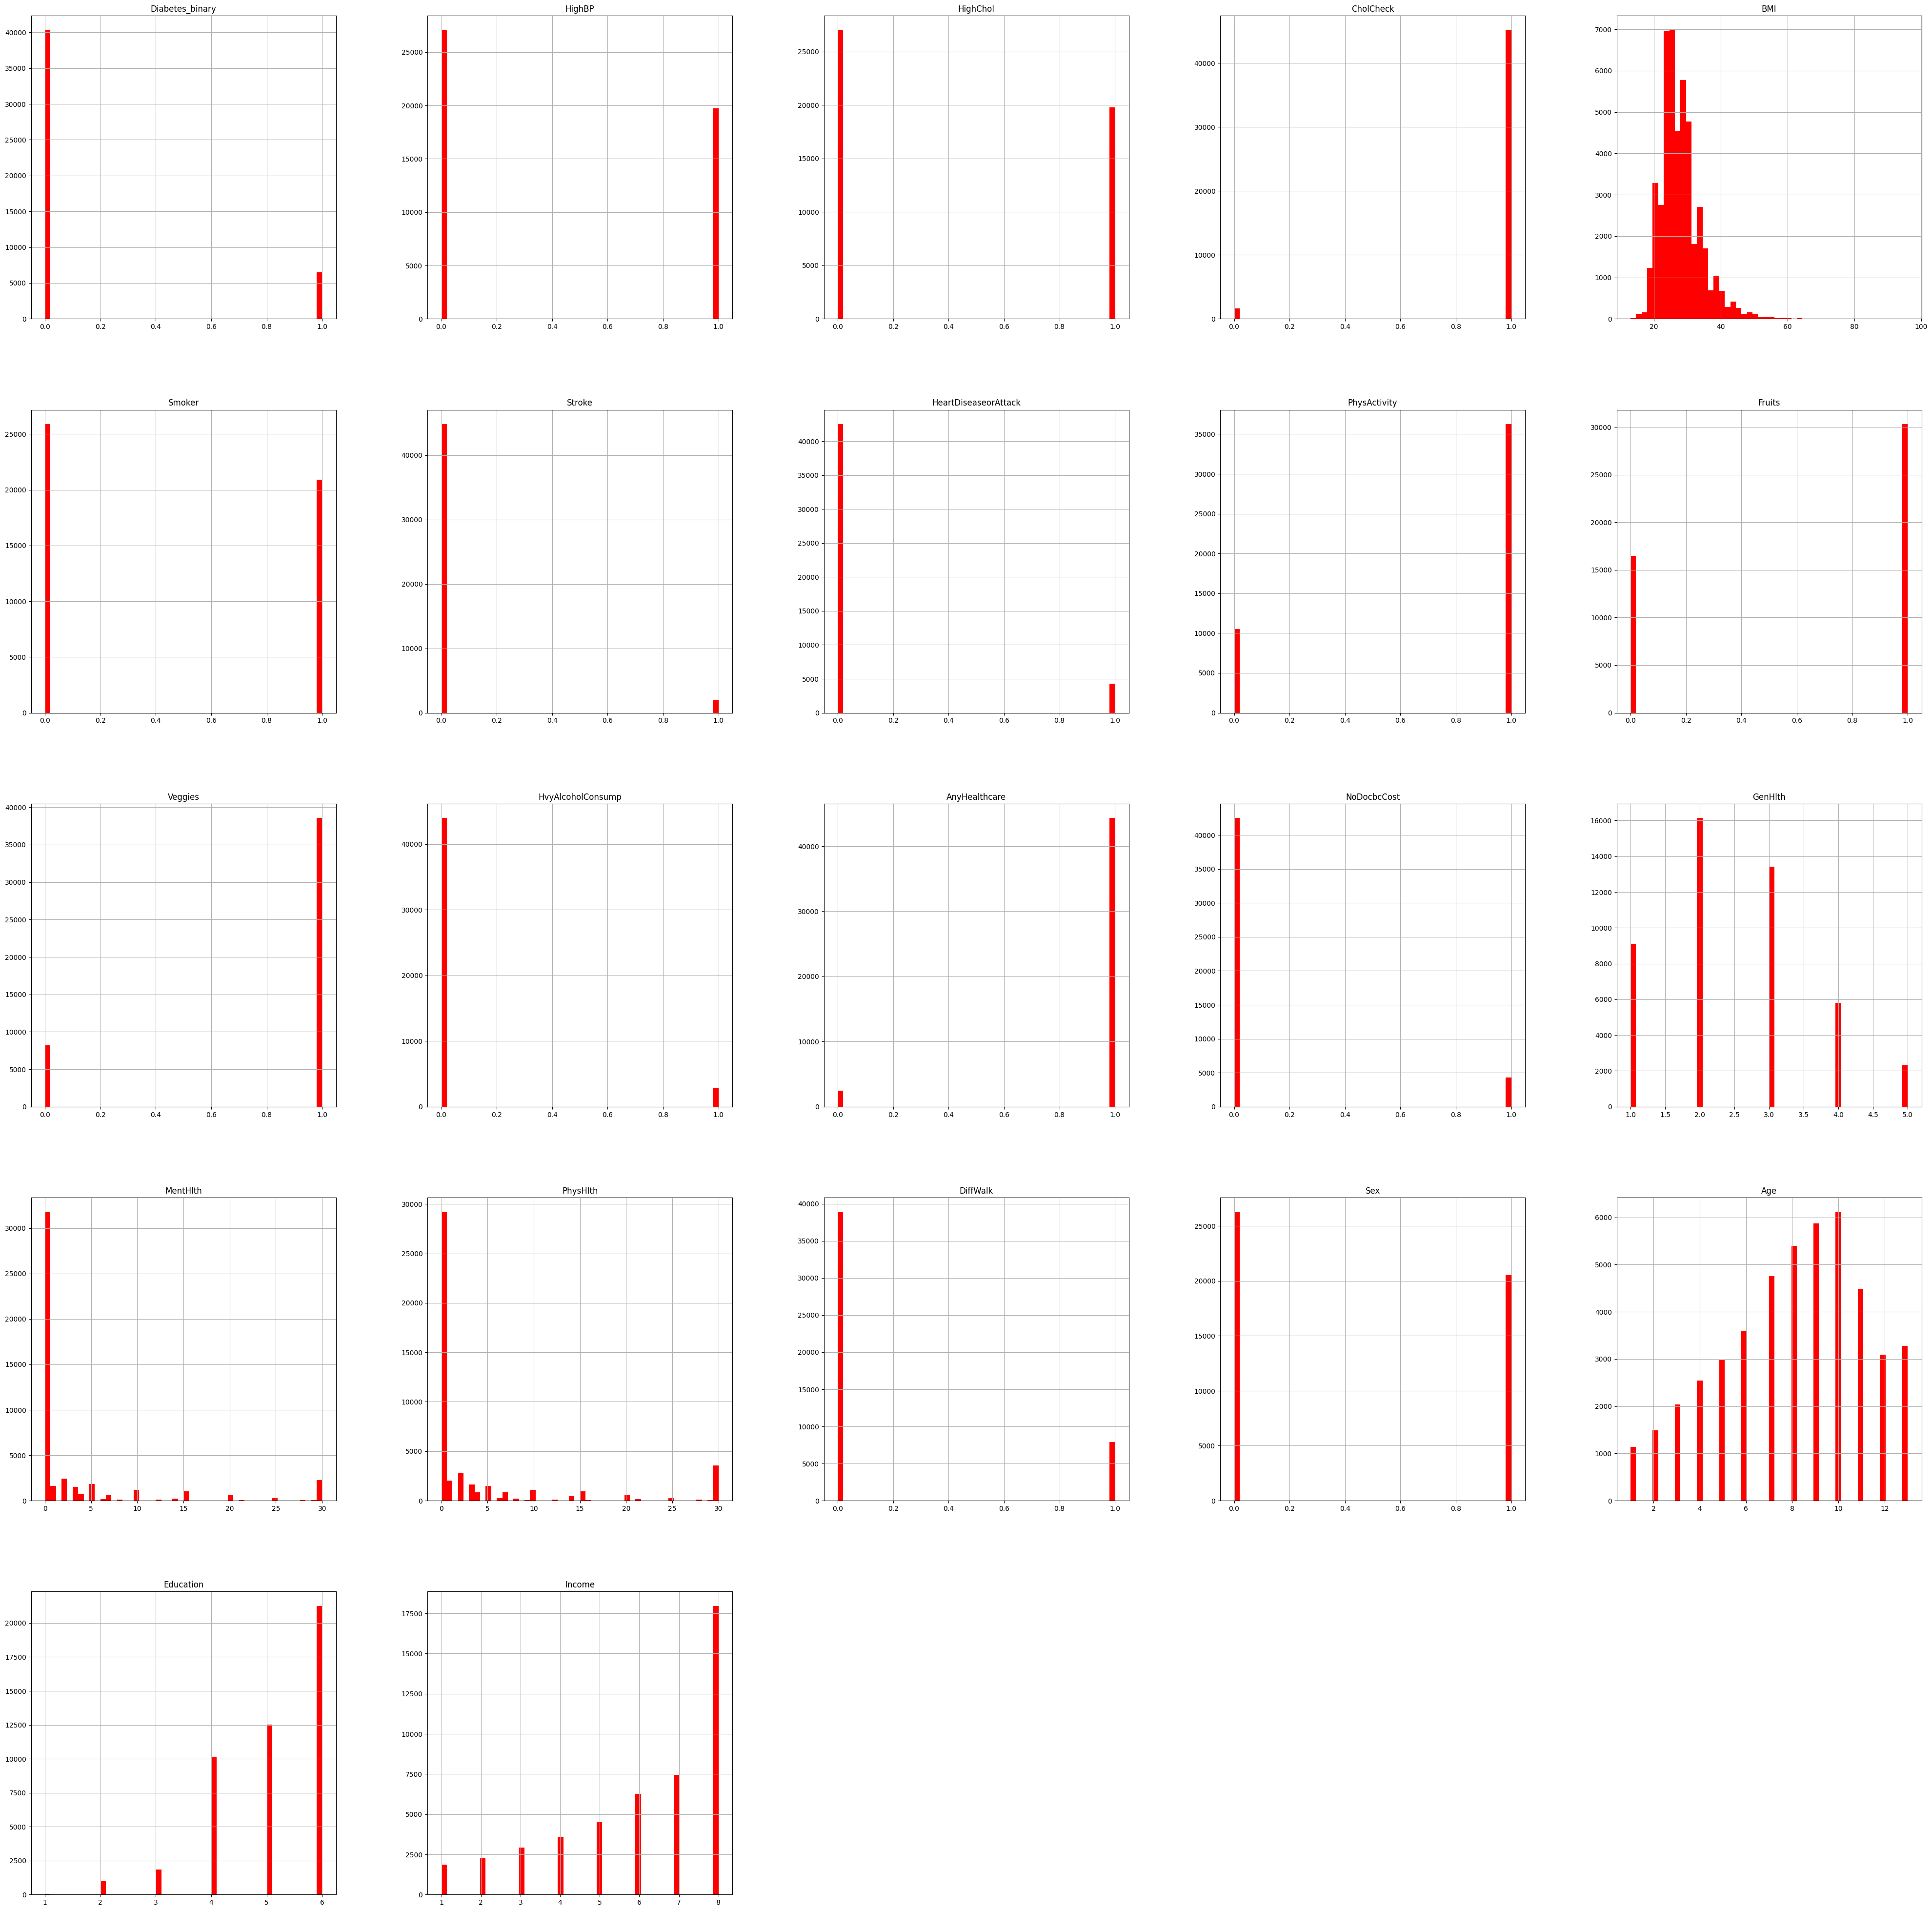

In [ ]:
df.hist(figsize=(50,50),bins=50,color='red')

<Axes: ylabel='Frequency'>

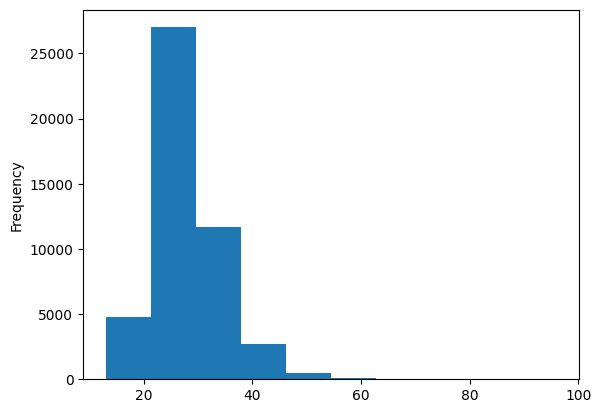

In [ ]:
df['BMI'].plot(kind='hist')

<Axes: ylabel='Frequency'>

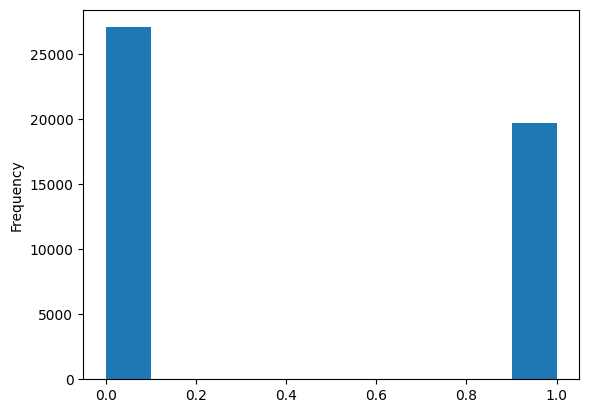

In [ ]:
df['HighBP'].plot(kind='hist')

<Axes: title={'center': 'Correlation with Diabetes Prediction'}>

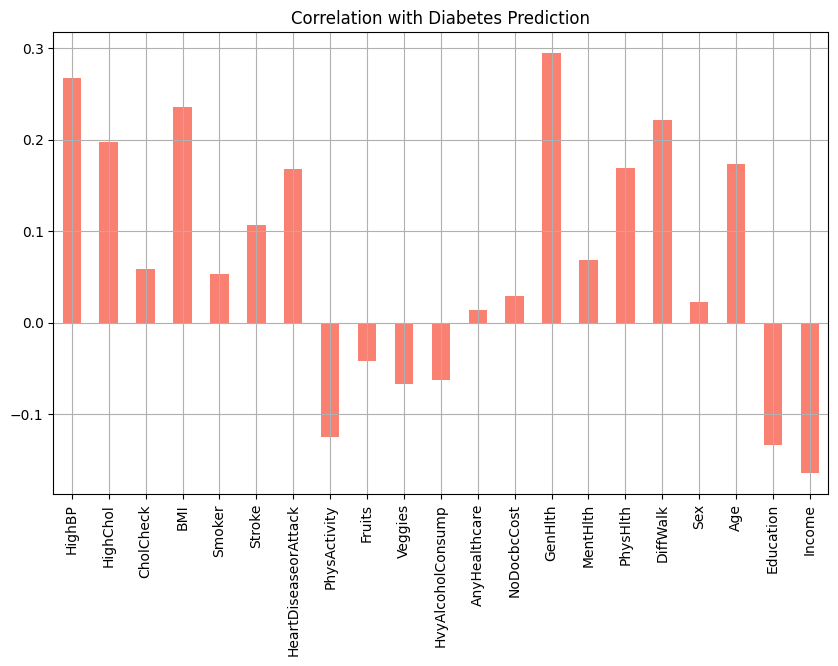

In [ ]:
df.drop('Diabetes_binary',axis=1).corrwith(df.Diabetes_binary).plot(kind='bar',grid=True,figsize=(10,6),title='Correlation with Diabetes Prediction',color='salmon')

In [ ]:
X=df[['BMI','HighBP']]
y=df['Diabetes_binary']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
classification_rep=classification_report(y_test,y_pred)
print(f"Accuracy:{accuracy}")
print(f"Confusion Matrix:{conf_matrix}")
print(f"Classification Report:{classification_rep}")

Accuracy:0.8566848348829753
Confusion Matrix:[[7966   57]
 [1284   50]]
Classification Report:              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      8023
         1.0       0.47      0.04      0.07      1334

    accuracy                           0.86      9357
   macro avg       0.66      0.52      0.50      9357
weighted avg       0.81      0.86      0.80      9357



In [ ]:
new_bmi=float(input("enter BMI :"))
new_high_bp=float(input("enter 1 if high bp or 0:"))
new_data=scaler.transform([[new_bmi,new_high_bp]])
prediction=model.predict(new_data)
if prediction[0]==1:
    print("model predicts that person is diabetic")
else:
    print("model predicts that person is not diabetic")

enter BMI :123
enter 1 if high bp or 0:1
model predicts that person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
X=df[['Stroke','HeartDiseaseorAttack']]
y=df['Smoker']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
classification_rep=classification_report(y_test,y_pred)
print(f"Accuracy:{accuracy}")
print(f"Confusion Matrix:{conf_matrix}")
print(f"Classification Report:{classification_rep}")

Accuracy:0.5759324569840761
Confusion Matrix:[[4688  429]
 [3539  701]]
Classification Report:              precision    recall  f1-score   support

         0.0       0.57      0.92      0.70      5117
         1.0       0.62      0.17      0.26      4240

    accuracy                           0.58      9357
   macro avg       0.60      0.54      0.48      9357
weighted avg       0.59      0.58      0.50      9357



In [ ]:
new_stroke=float(input("stroke: if yes 1, no 0 :"))
new_heartdis=float(input("enter 1 if heart disease  or 0:"))
new_data=scaler.transform([[new_stroke,new_heartdis]])
prediction=model.predict(new_data)
if prediction[0]==1:
    print("model predicts that person is a smoker")
else:
    print("model predicts that person is not a smoker")

stroke: if yes 1, no 0 :0
enter 1 if heart disease  or 0:1
model predicts that person is a smoker


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
X=df[['Stroke','HvyAlcoholConsump']]
y=df['HighChol']

In [ ]:
X_train,X_test,y_train,y_test
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
classification_rep=classification_report(y_test,y_pred)
print(f"Accuracy:{accuracy}")
print(f"Confusion Matrix:{conf_matrix}")
print(f"Classification Report:{classification_rep}")

Accuracy:0.5759324569840761
Confusion Matrix:[[4688  429]
 [3539  701]]
Classification Report:              precision    recall  f1-score   support

         0.0       0.57      0.92      0.70      5117
         1.0       0.62      0.17      0.26      4240

    accuracy                           0.58      9357
   macro avg       0.60      0.54      0.48      9357
weighted avg       0.59      0.58      0.50      9357



In [ ]:
new_stroke=float(input("stroke: if yes 1, no 0 :"))
new_heartdis=float(input("enter 1 if heavy alcohol consumption  or 0:"))
new_data=scaler.transform([[new_stroke,new_heartdis]])
prediction=model.predict(new_data)
if prediction[0]==1:
    print("model predicts that person is having high cholestrol")
else:
    print("model predicts that person is not having high cholestrol")

stroke: if yes 1, no 0 :1
enter 1 if heavy alcohol consumption  or 0:1
model predicts that person is having high cholestrol


In [ ]:
from sklearn import metrics

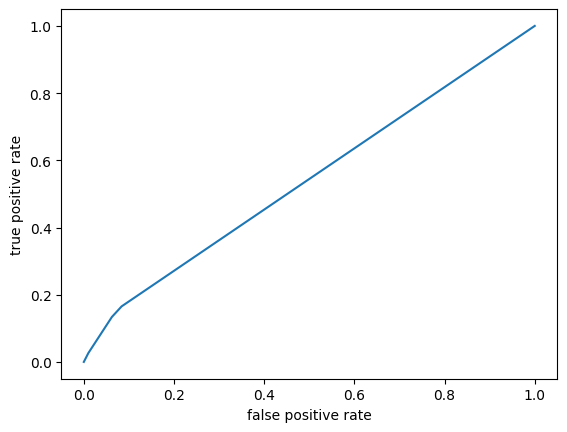

In [ ]:
y_pred=model.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

In [ ]:
columns_to_drop=['Income','Education','DiffWalk','PhysHlth','MentHlth','GenHlth','NoDocbcCost','AnyHealthcare','Fruits','Veggies']
df.drop(columns=columns_to_drop,inplace=True)

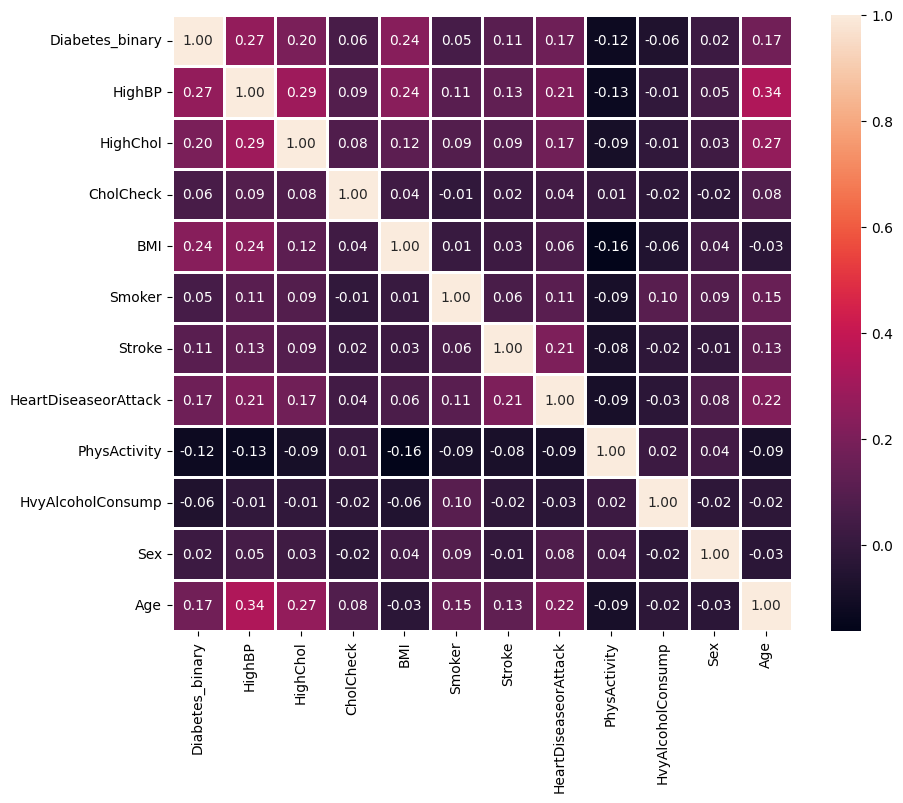

In [ ]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(10,8))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.8,
              fmt='0.2f')

In [ ]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
import warnings
import plotly.express as px
px_template="simple_white"

In [ ]:
data=pd.read_csv('diabetes_dataset.csv',sep=",",encoding='utf-8')
data.shape

(93579, 22)

In [ ]:
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} colums')

The dataset has 93579 rows and 22 colums


In [ ]:
data.head()
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

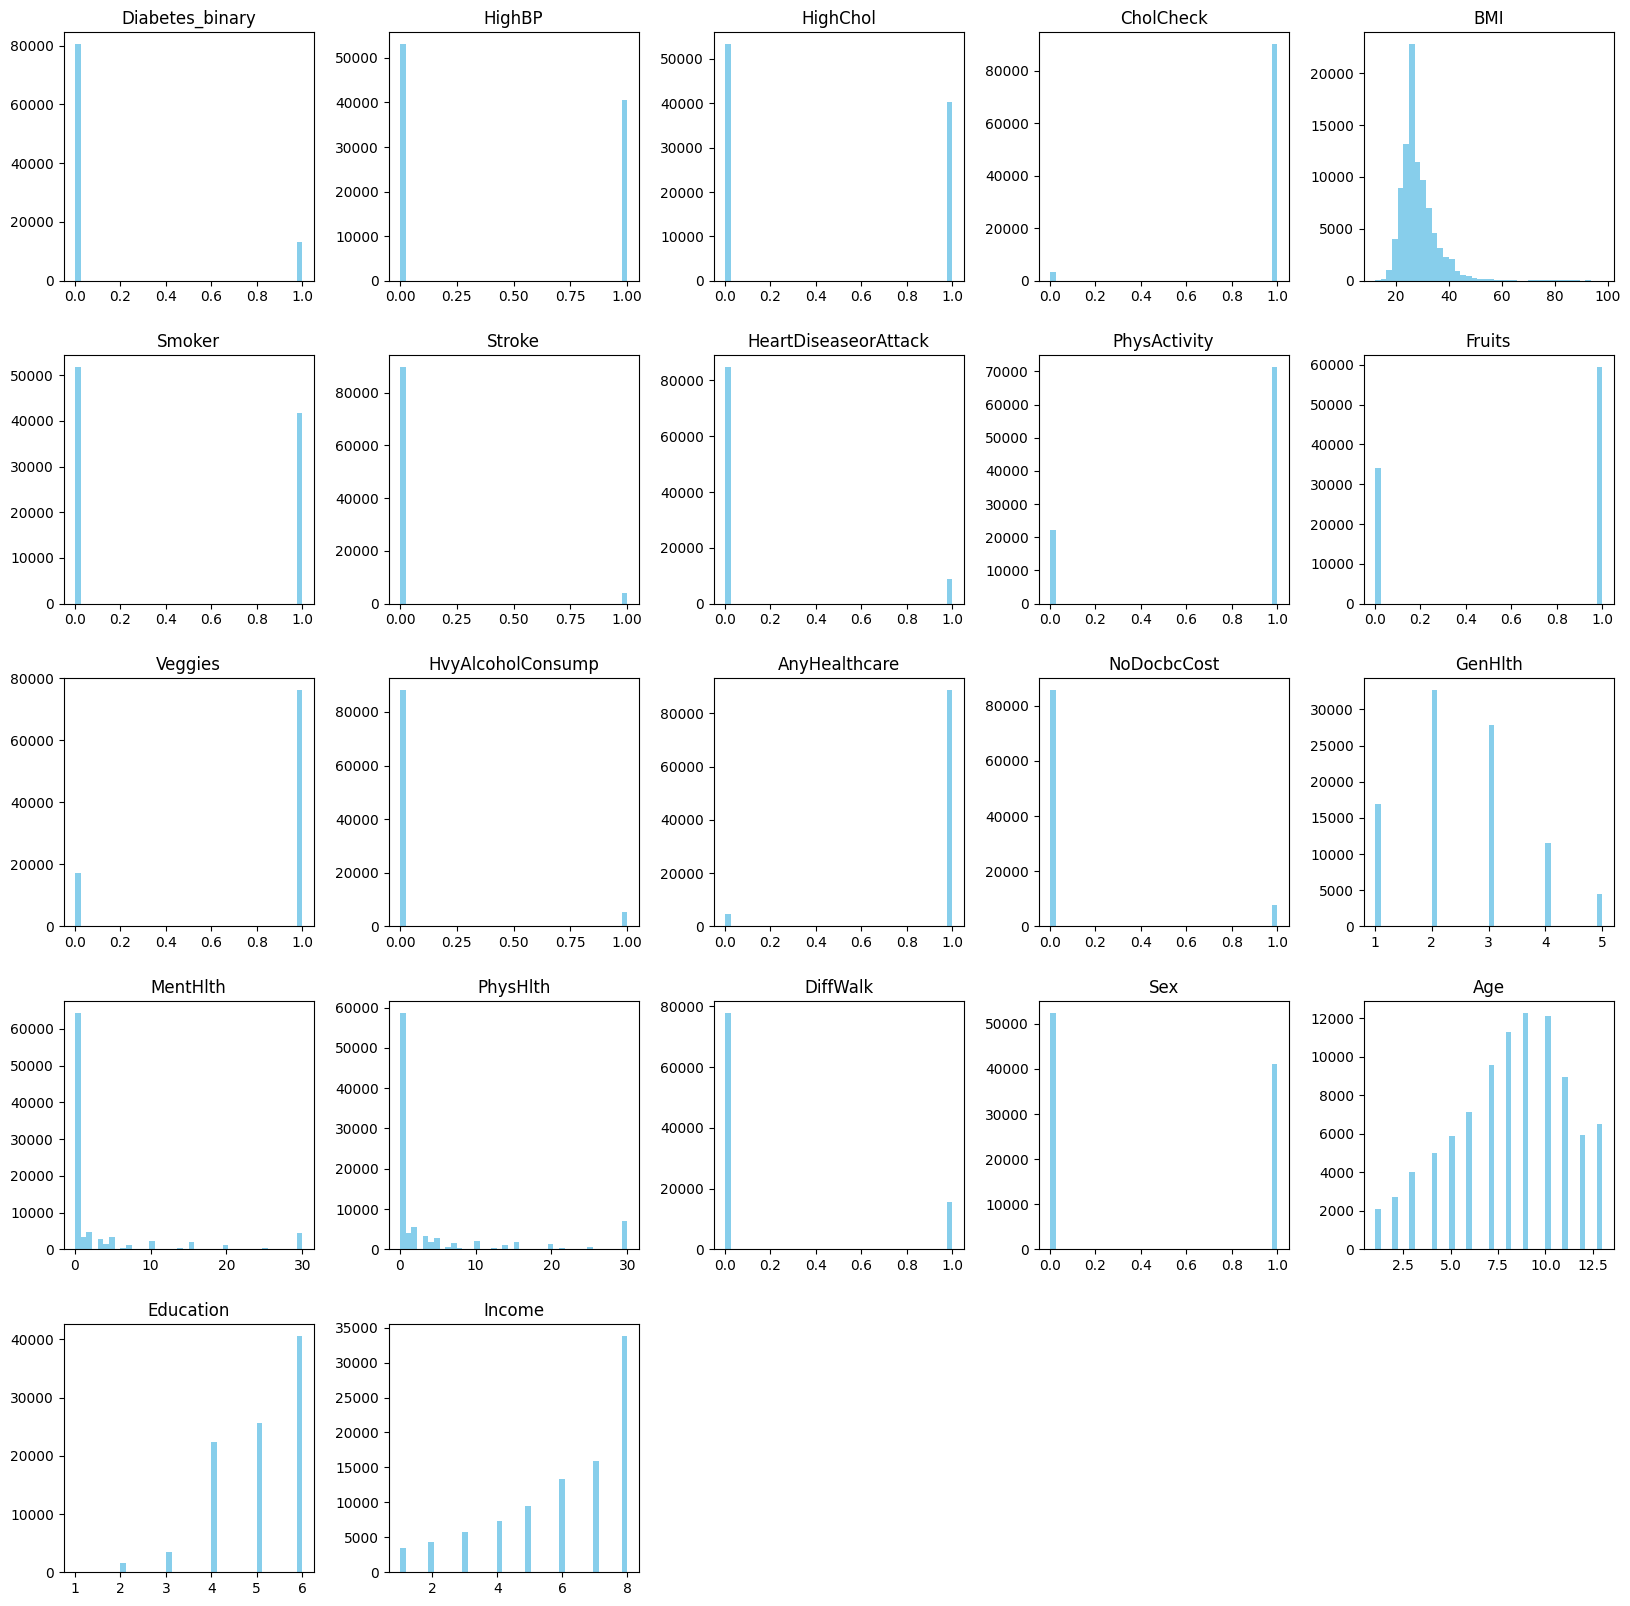

In [ ]:
ax=data.hist(bins=40,grid=False,figsize=(20,20),color='skyblue')

Text(0, 0.5, 'BMI')

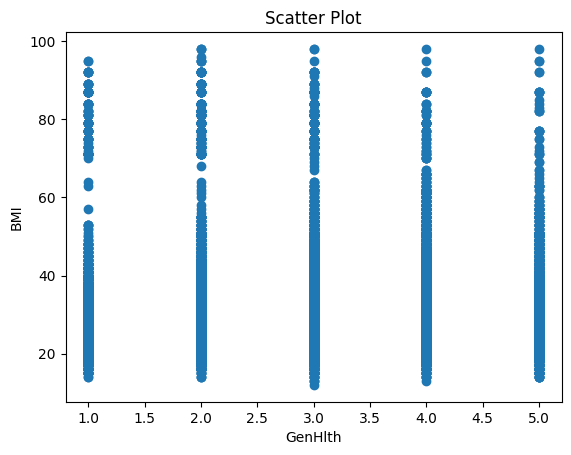

In [ ]:
plt.scatter(data['GenHlth'],data['BMI'])
plt.title("Scatter Plot")
plt.xlabel('GenHlth')
plt.ylabel('BMI')

<Axes: xlabel='BMI', ylabel='Diabetes_binary'>

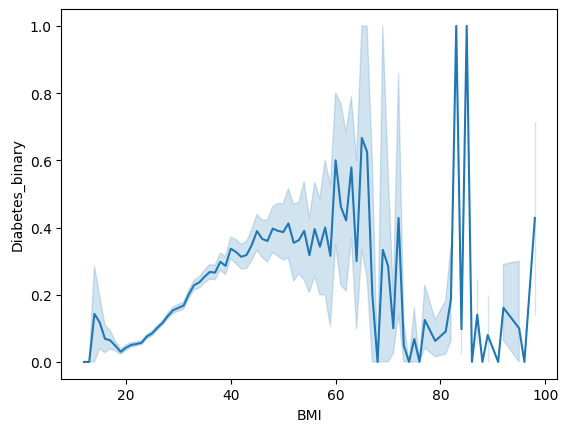

In [ ]:
sns.lineplot(x='BMI',y='Diabetes_binary',data=data)

<Axes: title={'center': 'Correaltion with diabetes prediction'}>

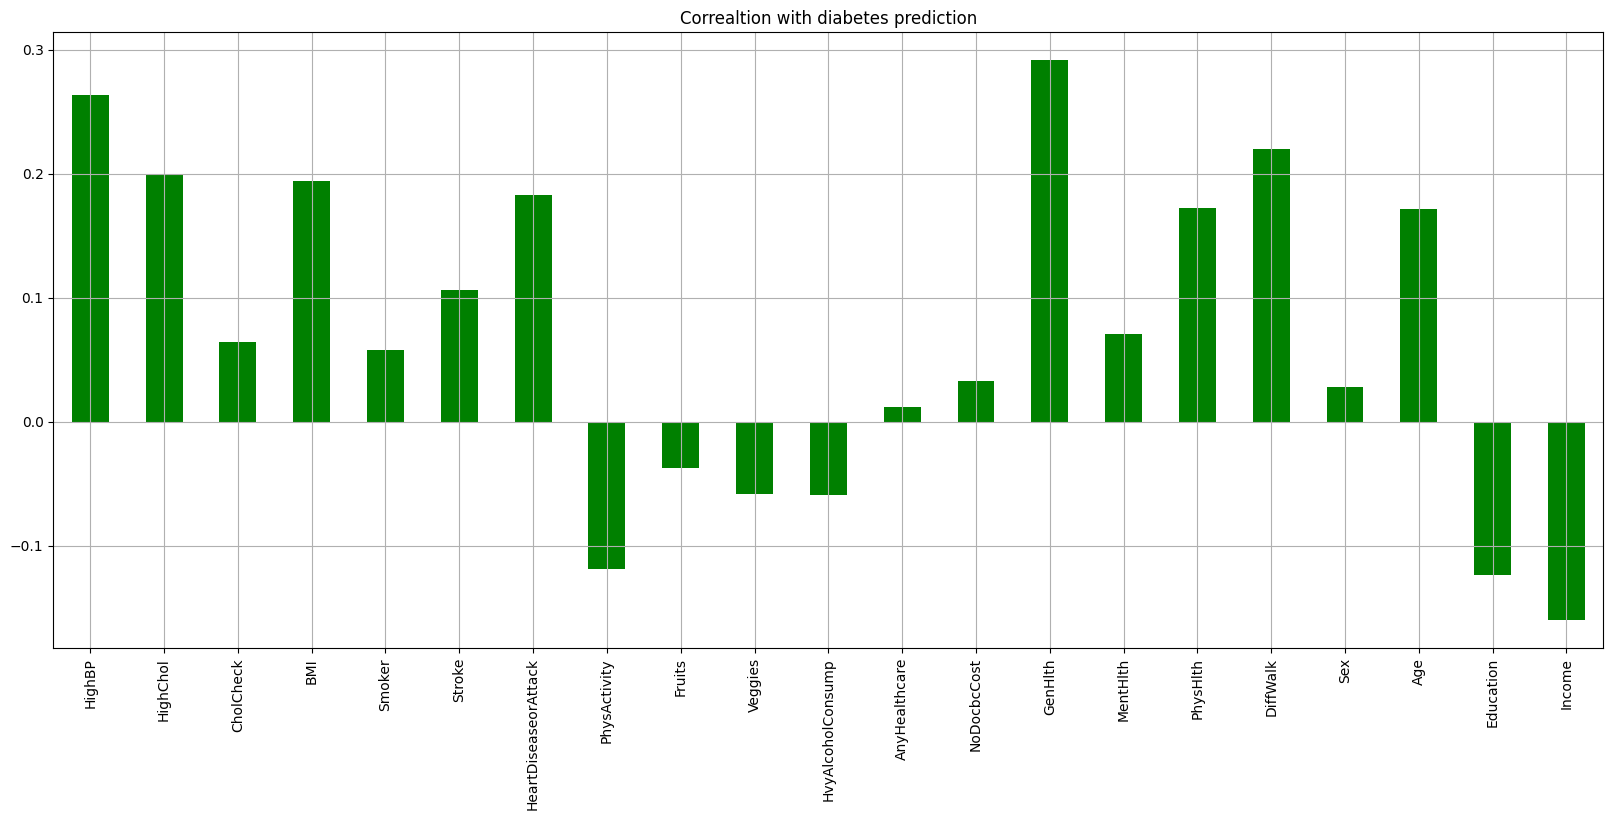

In [ ]:
data.drop('Diabetes_binary',axis=1).corrwith(data.Diabetes_binary).plot(kind='bar',grid=True,figsize=(20,8),title='Correaltion with diabetes prediction',color='green')

([<matplotlib.patches.Wedge at 0x785286fb2170>,
  ...],
 [Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.0999999680571457, 0.00026509296190573484, ''),
  Text(1.0999998722285846, 0.0005301859084154227, ''),
  Text(1.0999997125143224, 0.0007952788241330174, ''),
  Text(1.0999994889143683, 0.0010603716936624747, ''),
  Text(1.0999994889143683, 0.0010603716936624747, ''),
  Text(1.0999992014287352, 0.0013254645016077529, ''),
  Text(1.0999988500574398, 0.0015905572325728137, ''),
  Text(1.0999988500574398, 0.0015905572325728137, ''),
  Text(1.0999988500574398, 0.0015905572325728137, ''),
  Text(1.0999984348005027, 0.0018556498711616235, ''),
  Text(1.0999979556579478, 0.002120742401978155, ''),
  Text(1.0999979556579478, 0.002120742401978155, ''),
  Text(1.0999979556579478, 0.002120742401978155, ''),
  Text(1.0999979556579478, 0.002120742401978155, ''),
 

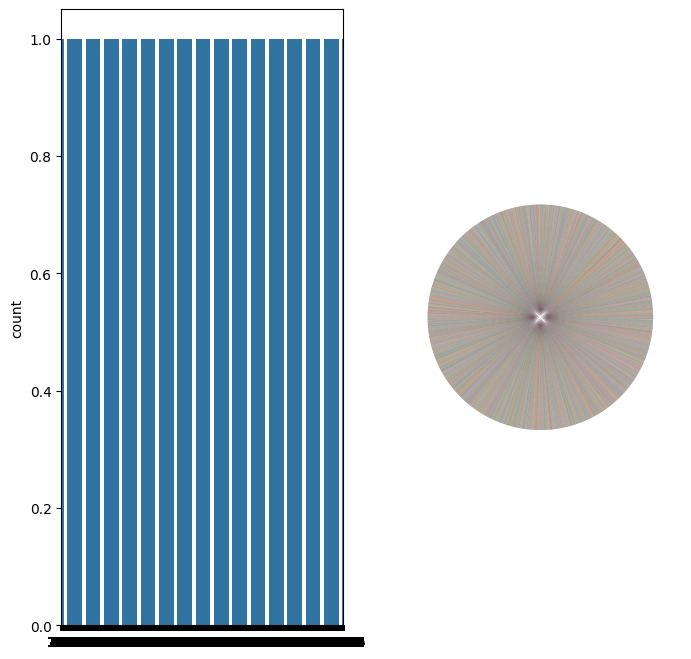

In [ ]:
figure1,plot1=plt.subplots(1,2,figsize=(8,8))
sns.countplot(data['Diabetes_binary'],ax=plot1[0])
labels=["non-Diabetic","Diabetic"]
plt.pie(data["Diabetes_binary"])

([<matplotlib.patches.Wedge at 0x7852269ede70>,
 [Text(-0.23147985474568744, 1.0753683447298026, 'non HighBP'),
  Text(0.23147985474568733, -1.0753683447298026, 'HighBP')],
 [Text(-0.12626173895219314, 0.5865645516708013, '56.75'),
  Text(0.12626173895219306, -0.5865645516708013, '43.25')])

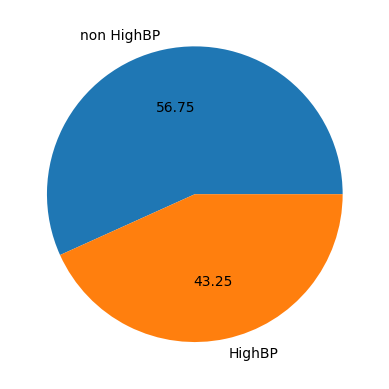

In [ ]:
labels=['non HighBP','HighBP']
plt.pie(data['HighBP'].value_counts(),labels = labels, autopct='%0.2f')

Text(0, 0.5, 'Frequency')

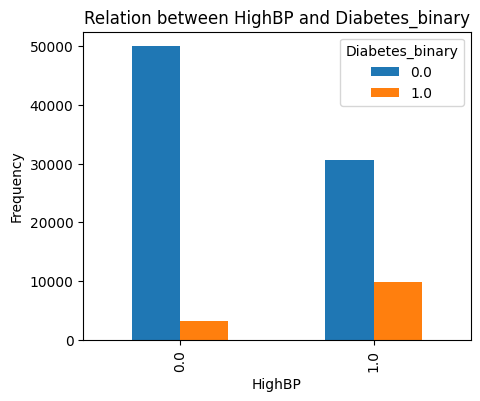

In [ ]:
pd.crosstab(data.HighBP,data.Diabetes_binary).plot(kind='bar',figsize=(5,4))
plt.title('Relation between HighBP and Diabetes_binary')
plt.xlabel('HighBP')
plt.ylabel('Frequency')


([<matplotlib.patches.Wedge at 0x7852161948e0>,
 [Text(-0.24017262610057813, 1.0734603437817123, 'non HighChol'),
  Text(0.24017252559596594, -1.0734603662682918, 'HighChol')],
 [Text(-0.1310032506003153, 0.5855238238809339, '57.01'),
  Text(0.13100319577961778, -0.585523836146341, '42.99')])

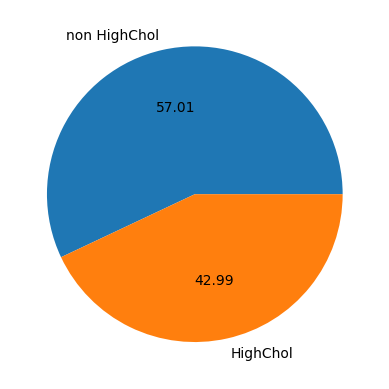

In [ ]:
labels=['non HighChol','HighChol']
plt.pie(data['HighChol'].value_counts(),labels = labels, autopct='%0.2f')

Text(0, 0.5, 'Frequency')

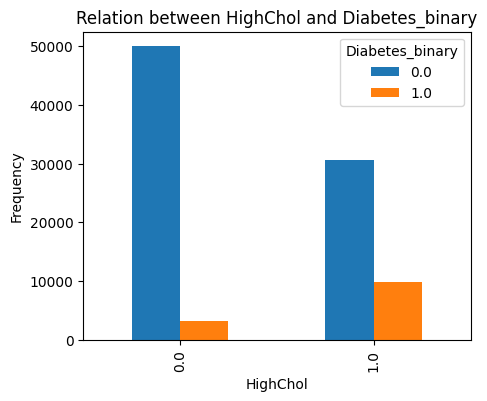

In [ ]:
pd.crosstab(data.HighBP,data.Diabetes_binary).plot(kind='bar',figsize=(5,4))
plt.title('Relation between HighChol and Diabetes_binary')
plt.xlabel('HighChol')
plt.ylabel('Frequency')

In [ ]:
(data.groupby(['HighBP','HighChol'])['Diabetes_binary'].value_counts()/data.groupby(['HighBP','HighChol'])['Diabetes_binary'].count())*100

HighBP  HighChol  Diabetes_binary
0.0     0.0       0.0                95.896509
                  1.0                 4.103491
        1.0       0.0                89.762454
                  1.0                10.237546
1.0     0.0       0.0                83.286241
                  1.0                16.713759
        1.0       0.0                70.438952
                  1.0                29.561048
dtype: float64

Text(0.5, 1.0, 'Relation between HighBP, HighChol and Diabetes')

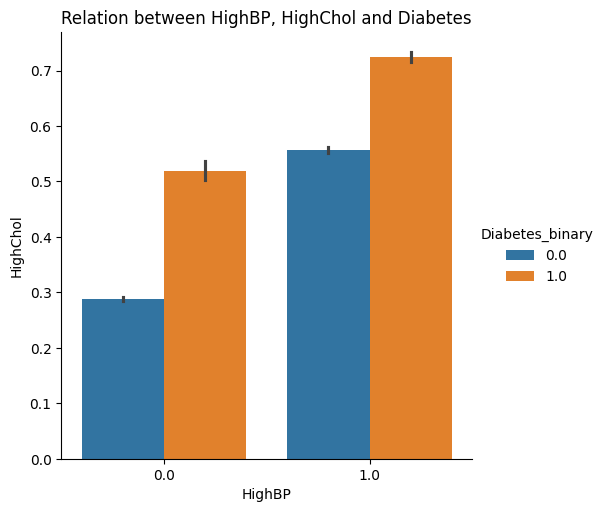

In [ ]:
sns.catplot(x='HighBP',y='HighChol',data=data,hue="Diabetes_binary",kind='bar')
plt.title('Relation between HighBP, HighChol and Diabetes')

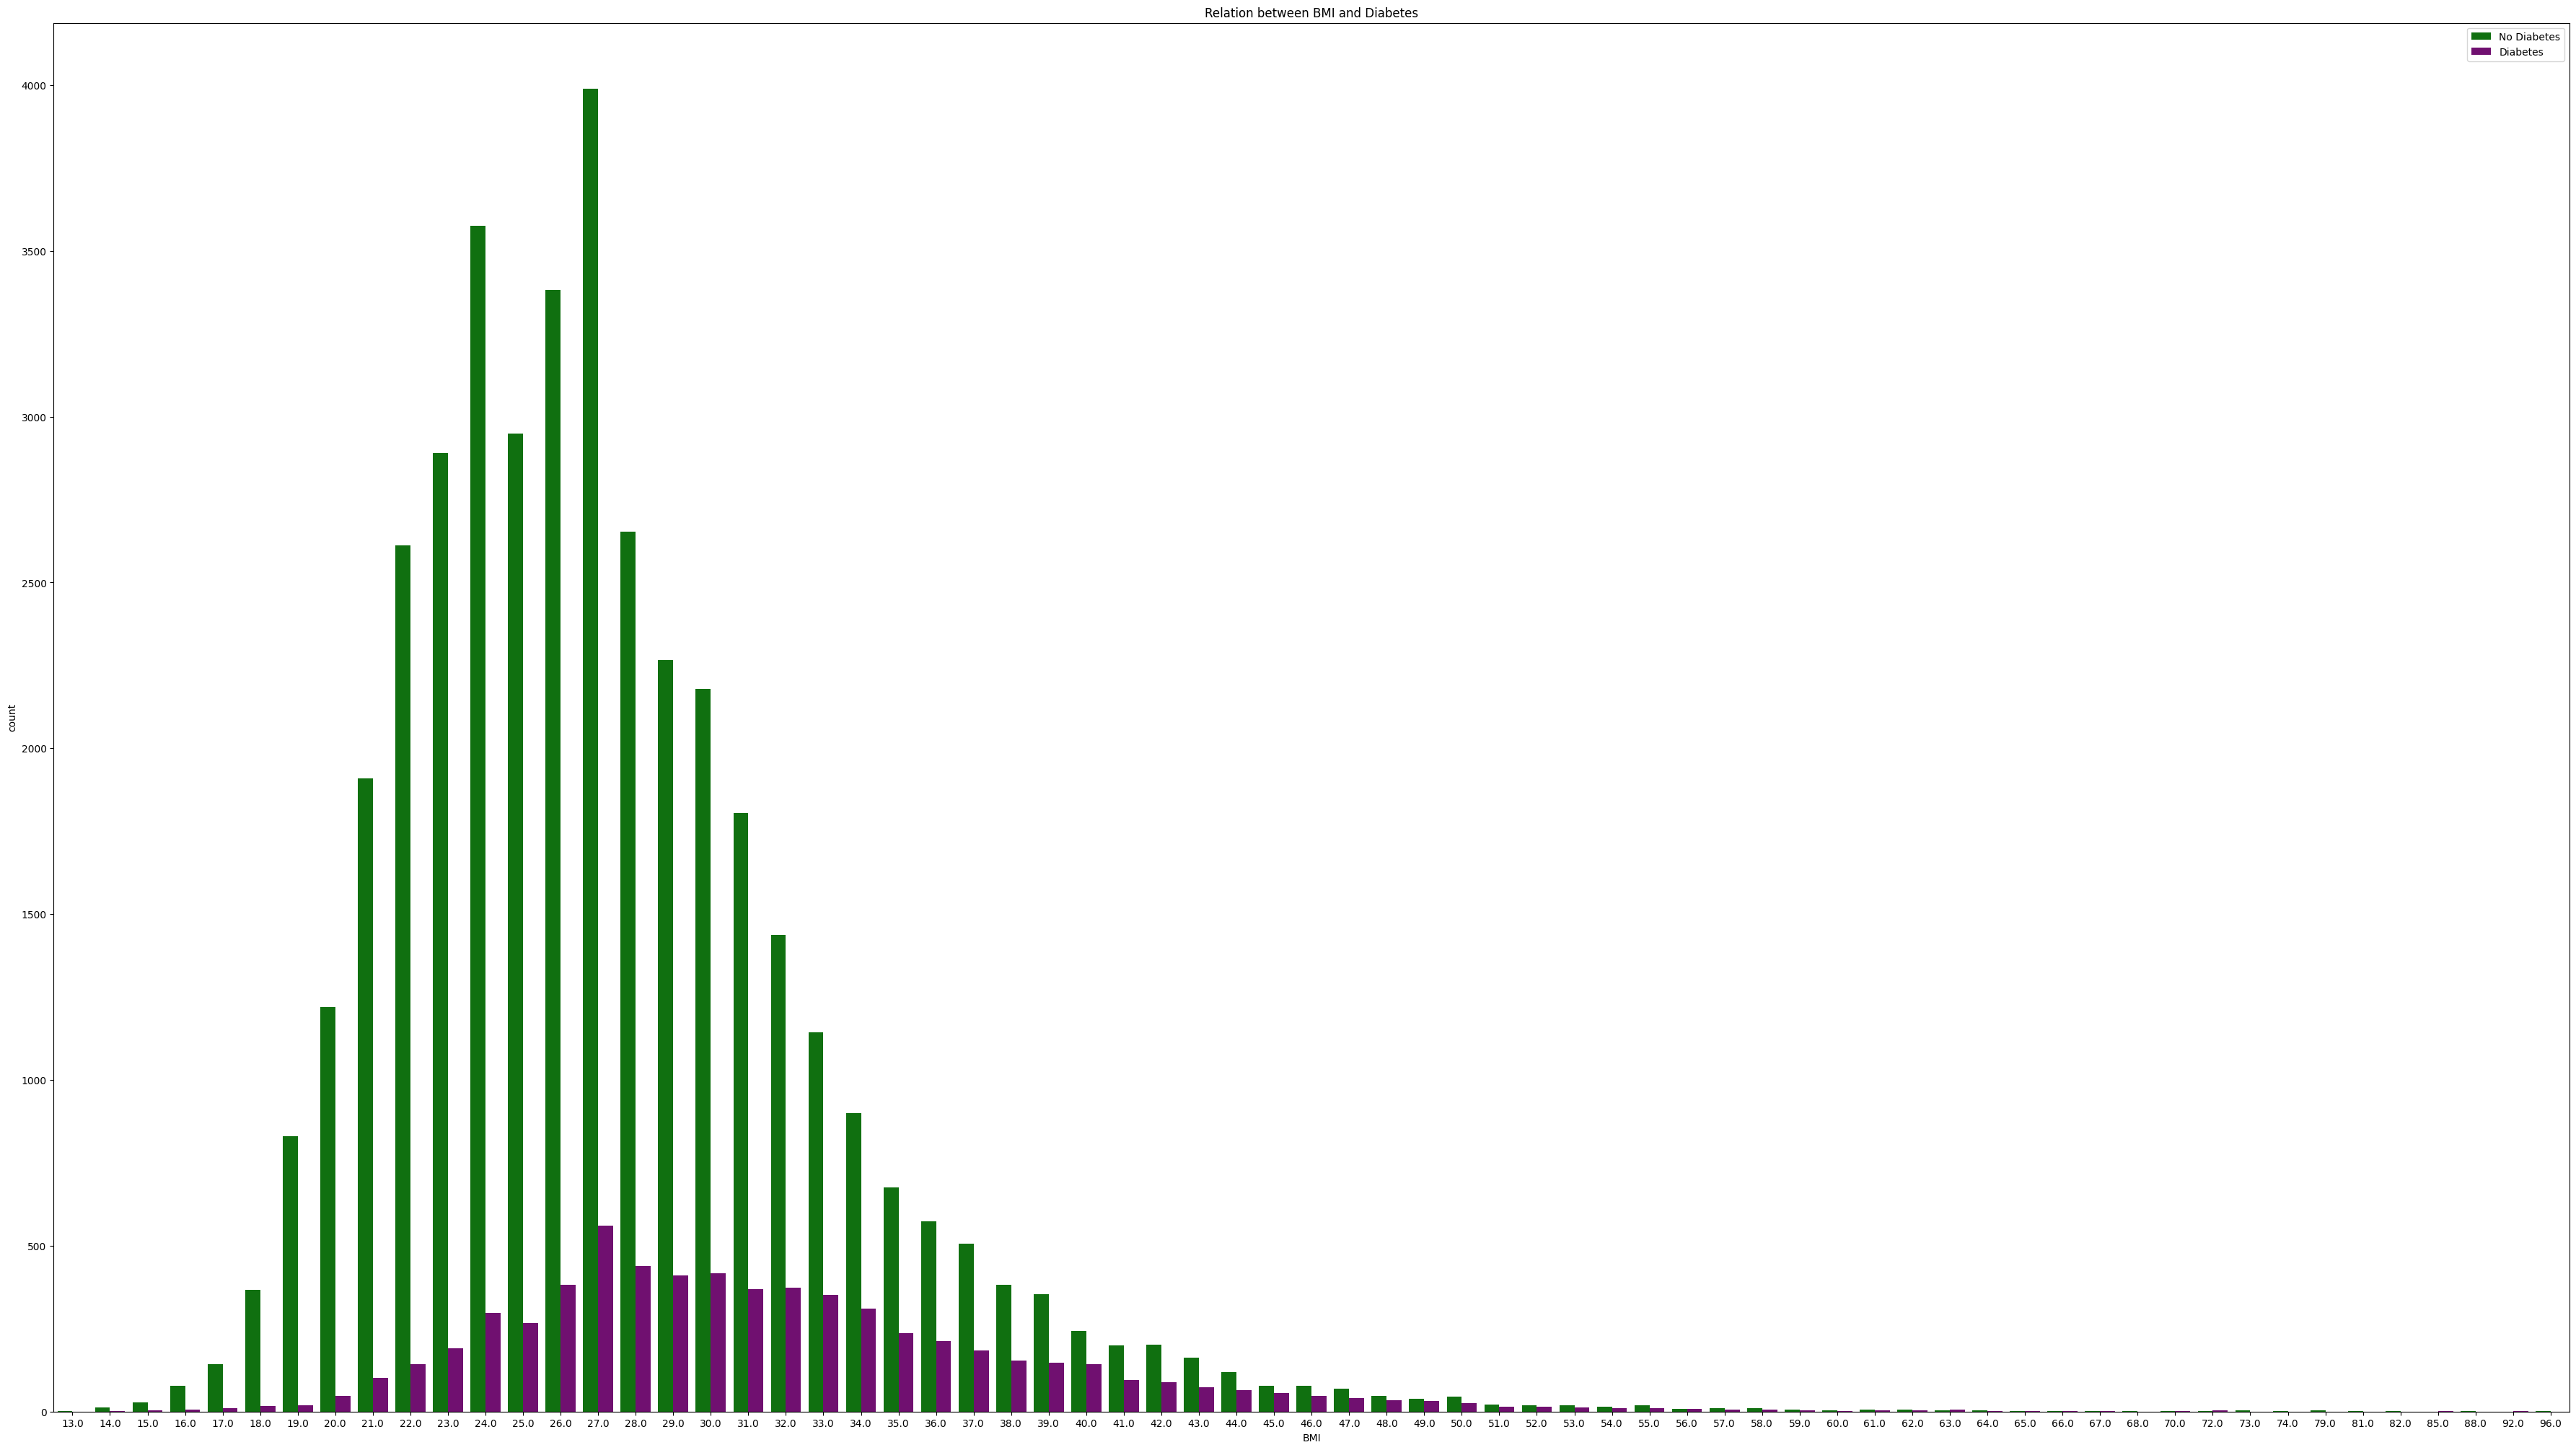

In [ ]:
plt.figure(figsize=(45,25))
warnings.filterwarnings('ignore')
sns.countplot(data=df, x='BMI', hue='Diabetes_binary', palette=['green', 'purple'])
plt.title("Relation between BMI and Diabetes")
plt.legend(labels=['No Diabetes', 'Diabetes'])

([<matplotlib.patches.Wedge at 0x785226cf86d0>,
 [Text(-0.1844147440182304, 1.084431280528504, 'non smoker'),
  Text(0.1844146424864455, -1.0844312977946535, 'smoker')],
 [Text(-0.10058986037358021, 0.5915079711973656, '55.36'),
  Text(0.10058980499260663, -0.5915079806152655, '44.64')])

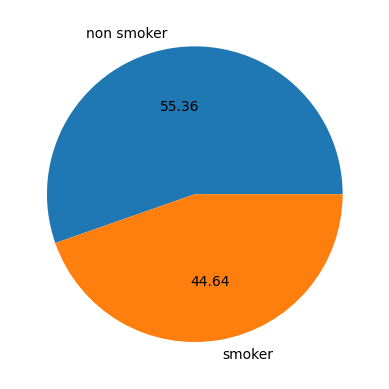

In [ ]:
labels=['non smoker','smoker']
plt.pie(data['Smoker'].value_counts(),labels=labels,autopct='%0.2f')

In [ ]:
pd.crosstab(data.Smoker,data.Diabetes_binary)

Diabetes_binary,0.0,1.0
Smoker,,
0.0,45517,6290
1.0,35026,6746


Text(0, 0.5, 'Frequency')

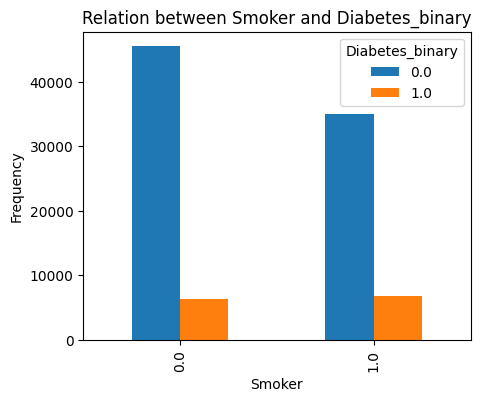

In [ ]:
pd.crosstab(data.Smoker,data.Diabetes_binary).plot(kind='bar',figsize=(5,4))
plt.title('Relation between Smoker and Diabetes_binary')
plt.xlabel('Smoker')
plt.ylabel('Frequency')

([<matplotlib.patches.Wedge at 0x785226c0f940>,
 [Text(-1.0819738141043853, 0.19832464696151392, 'non HvyAlcoholConsump'),
  Text(1.0819737955358872, -0.1983247482632121, 'HvyAlcoholConsump')],
 [Text(-0.5901675349660284, 0.10817708016082576, '94.23'),
  Text(0.5901675248377566, -0.10817713541629749, '5.77')])

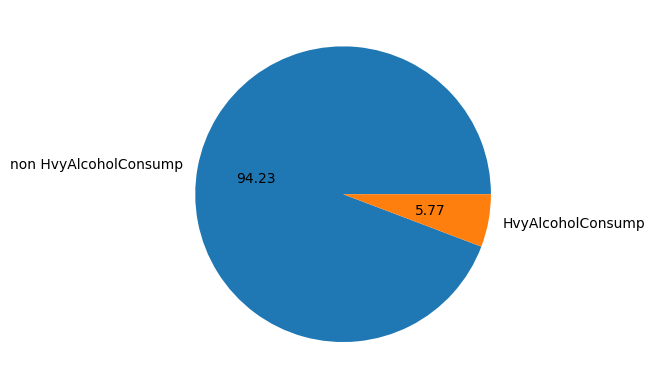

In [ ]:
labels=['non HvyAlcoholConsump','HvyAlcoholConsump']
plt.pie(data['HvyAlcoholConsump'].value_counts(),labels=labels,autopct='%0.2f')

In [ ]:
(data.groupby(['Smoker','HvyAlcoholConsump'])['Diabetes_binary'].value_counts()/data.groupby(['Smoker','HvyAlcoholConsump'])['Diabetes_binary'].count())*100

Smoker  HvyAlcoholConsump  Diabetes_binary
0.0     0.0                0.0                87.534565
                           1.0                12.465435
        1.0                0.0                96.370331
                           1.0                 3.629669
1.0     0.0                0.0                82.995846
                           1.0                17.004154
        1.0                0.0                93.198057
                           1.0                 6.801943
dtype: float64

Text(0.5, 1.0, 'Relation between Smoker, HvyAlcoholConsump and Diabetes')

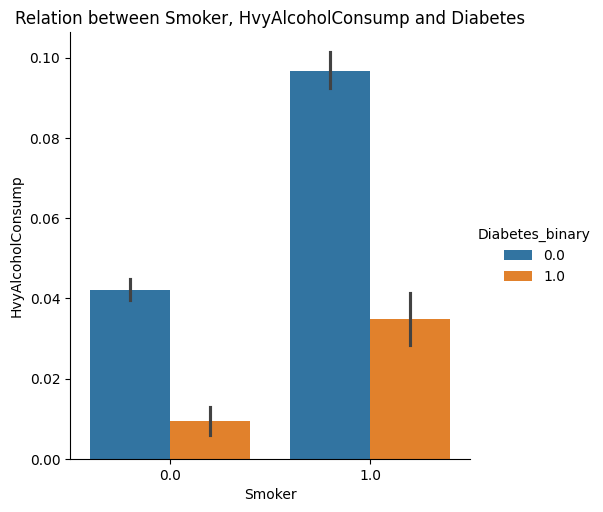

In [ ]:
sns.catplot(x='Smoker', y='HvyAlcoholConsump', hue='Diabetes_binary', data=df, kind='bar')
plt.title('Relation between Smoker, HvyAlcoholConsump and Diabetes')

In [ ]:
sns.catplot(x='Stroke',y='HeartDiseaseAttack',data=data,hue="diabetes_binary",kind='bar')
plt.title('Relation between Stroke, HeartDiseaseAttack and Diabetes')

ValueError: Could not interpret value `HeartDiseaseAttack` for `y`. An entry with this name does not appear in `data`.

In [ ]:
labels=['non PhysActivity','PhysActivity']
plt.pie(data['PhysActivity'].value_counts(),labels=labels,autopct='%0.2f')

In [ ]:
pd.crosstab(data.PhysActivity,data.Diabetes_binary)

In [ ]:
pd.crosstab(data.PhysActivity,data.Diabetes_binary).plot(kind='bar',figsize=(5,4))
plt.title('Relation between PhysActivity and Diabetes_binary')
plt.xlabel('PhysActivity')
plt.ylabel('Frequency')

In [ ]:
pd.crosstab(data.Fruits,data.Diabetes_binary)

In [ ]:
pd.crosstab(data.Fruits,data.Diabetes_binary).plot(kind='bar',figsize=(5,4))
plt.title('Relation between Fruits and Diabetes_binary')
plt.xlabel('Fruits')
plt.ylabel('Frequency')

In [ ]:
pd.crosstab(data.Veggies,data.Diabetes_binary)

In [ ]:
pd.crosstab(data.Fruits,data.Diabetes_binary).plot(kind='bar',figsize=(5,4))
plt.xlabel('Veggies')
plt.ylabel('Frequency')

In [ ]:
pd.crosstab(data.MentHlth,data.Diabetes_binary).T

In [ ]:
plt.figure(figsize=(15,10))
warnings.filterwarnings('ignore')
sns.distplot(data.MentHlth[data.Diabetes_binary==0],color='green',label='Non diabetic')
sns.distplot(data.MentHlth[data.Diabetes_binary==1],color='purple',label=' diabetic')
plt.title('Relation between MentHlth and Diabetes')
plt.legend()

In [ ]:
import statsmodels
print(statsmodels.__version__)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
model=ols('HighBP ~ C(Diabetes_binary)',data=df).fit()
anova_table=sm.stats.anova_lm(model,typ=2)
print(anova_table)
alpha=0.05
if anova_table['PR(>F)']['C(Diabetes_binary)']<alpha:
    print('Reject null hypothesis-there is significant difference between HighBP in individual with and without diabetes')
else:
    print('Fail to reject null hypothesis-there is no significant difference between HighBP in individual with and without diabetes')
sqft_living_no_waterfront=df[df['Diabetes_binary']==0]['HighBP']
sqft_living_waterfront=df[df['Diabetes_binary']==1]['HighBP']
f_statistic,p_value=f_oneway(sqft_living_no_waterfront,sqft_living_waterfront)
print('F statistic:',f_statistic)
print('P-value',p_value)
alpha=0.05
if p_value<alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

In [ ]:
import plotly.graph_objects as gp
import os

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.dropna() #drop rows with NaN values

In [ ]:
df.head(10)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve,auc

In [ ]:
Xs=df.drop(columns='Diabetes_binary')
ys=df['Diabetes_binary']
X_train,X_test,y_train,y_test=train_test_split(Xs,ys,test_size=0.2,random_state=42)

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
model=LogisticRegression()
model.fit(X_train,y_train)

In [ ]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))

In [ ]:
print('Confusion Matrix:\n', confusion_matrix(y_test,y_pred))
print('\nClassification Report:\n',classification_report(y_test,y_pred))

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix,roc_curve,auc

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

In [ ]:
y_rpred=rf.predict(X_test)
y_pred

In [ ]:
y_rpred

In [ ]:
y_test

In [ ]:
name='Random Forest'
accuracy=accuracy_score(y_test,y_rpred)
precision=precision_score(y_test,y_rpred)
recall=recall_score(y_test,y_rpred)
f1=f1_score(y_test,y_rpred)
roc_auc=roc_auc_score(y_test,y_rpred)
print(f'Classifier: {name}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 SCORE: {f1}')
print(f'ROC AUC SCORE: {roc_auc}')
print('-----------------------------------------------')
name='Logistic Regression'
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)
print(f'Classifier: {name}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 SCORE: {f1}')
print(f'ROC AUC SCORE: {roc_auc}')